In [1]:
import pandas as pd
import plotly

# Read the CSV filed
df = pd.read_excel('./data/HBV_land_data.xlsx')  # Assuming tab-separated based on your image


In [2]:
# Import the model
from hbv_model import HBVModel
from calibration import calibrate_hbv_model  # function to do the calibration
import pandas as pd


# 1. Initialize the model
model = HBVModel()

# # 2. Load your data (either from file or DataFrame)
# # Read the data from pandas df
model.load_data(data=df,
               date_column='Date',
               precip_column='P',
               temp_column='T',
               pet_column='PET',
               obs_q_column='Q',
               date_format='%Y%m%d')
            #    start_date='1984-01-15',          # start date you want
            #    end_date='1992-01-15',
            # )  # if you have observed discharge




Detected 12 PET values (monthly means), expanding to daily values...
Time step detected: D
Loaded data with 4017 time steps, from 1981-01-01 00:00:00 to 1991-12-31 00:00:00


In [3]:
import matplotlib.pyplot as plt 
model.data

,Date,P,T,Q,PET
0,1981-01-01,0.0,-1.0,0.002,0.050000
1,1981-01-02,0.0,-3.6,0.005,0.052903
2,1981-01-03,0.2,-8.0,0.005,0.055806
3,1981-01-04,0.1,-10.3,0.005,0.058710
4,1981-01-05,0.0,-15.0,0.005,0.061613
...,...,...,...,...,...
4012,1991-12-27,0.0,-4.7,0.748,0.000000
4013,1991-12-28,0.0,-1.7,0.702,0.000000
4014,1991-12-29,0.0,2.0,0.701,0.000000
4015,1991-12-30,0.0,1.0,0.763,0.000000


In [4]:

custom_params = {
    'snow': {
        'TT': {'min': -2.0, 'max': 2.0, 'default': 0.0},      # Temperature threshold for snow/rain (°C)
        'CFMAX': {'min': 1.0, 'max': 6.0, 'default': 4},      # Degree-day factor (mm/°C/day)
        'PCF': {'min': 0.65, 'max': 1.0, 'default': 0.67},      # Precipitation correction factor (-)
        'SFCF': {'min': 0, 'max': 1.5, 'default': 0.3},     # Snowfall correction factor (-)
        'CFR': {'min': 0.0, 'max': 0.2, 'default': 0.05},     # Refreezing coefficient (-)
        'CWH': {'min': 0.0, 'max': 0.2, 'default': 0.1}       # Water holding capacity of snow (-)
    },
    'soil': {
        'FC': {'min': 50.0, 'max': 650, 'default': 450.0},  # Field capacity (mm)
        'LP': {'min': 0.3, 'max': 1.0, 'default': 0.75},      # Limit for potential evaporation (-)
        'BETA': {'min': 1.0, 'max': 35, 'default': 3.0}      # Shape coefficient (-)
    },
    'response': {
        'K0': {'min': 0.01, 'max': 0.9, 'default': 0.12},      # Quick flow recession coefficient (1/day)
        'K1': {'min': 0.005, 'max': 0.5, 'default': 0.05},     # Intermediate flow recession coefficient (1/day)
        'K2': {'min': 0.0005, 'max': 0.5, 'default': 0.05},     # Baseflow recession coefficient (1/day)
        'UZL': {'min': 5.0, 'max': 50.0, 'default': 28.0},    # Upper zone threshold (mm)
        'PERC': {'min': 0.03, 'max': 25, 'default': 0.25}     # Percolation rate (mm/day)
    }
}
model.set_parameters(custom_params)

#4. Set initial conditions (optional - uses defaults if not set)
model.set_initial_conditions(
    snowpack=0,  #initial snowpack (mm)
    liquid_water=0,    # Initial liquid water in snow (mm)
    soil_moisture= 650,  # Initial soil moisture (mm)
    upper_storage=80,   # Initial upper zone storage (mm)
    lower_storage=30, ) # Initial lower zone storage (mm)

# 5. Run the model
results = model.run()

Initial conditions updated.
Starting model run for 4017 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: -3.325
KGE: -2.859
PBIAS: -63.2%
Correlation: 0.020


In [5]:
#6. Visualize results
# model.plot_results(output_file='fig.png')

#7. Save results to CSV (optional)
#model.save_results("./results/hbv_uncalibrated_results.csv")

Starting calibration using L-BFGS-B method...
Optimizing NSE with 14 parameters and 500000000 iterations
Starting model run for 4017 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: -0.374
KGE: 0.151
PBIAS: -74.9%
Correlation: 0.757
Starting model run for 4017 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: -0.367
KGE: 0.155
PBIAS: -74.7%
Correlation: 0.762
Starting model run for 4017 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: -0.374
KGE: 0.151
PBIAS: -74.9%
Correlation: 0.757
Starting model run for 4017 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: -0.374
KGE: 0.151
PBIAS: -74.9%
Correlation: 0.757
Starting model run for 4017 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: -0.374
KGE: 0.151
PBIAS: -74.9%
Correlation: 0.757
Starting model run for 4017 time steps...
Model run completed successfully!

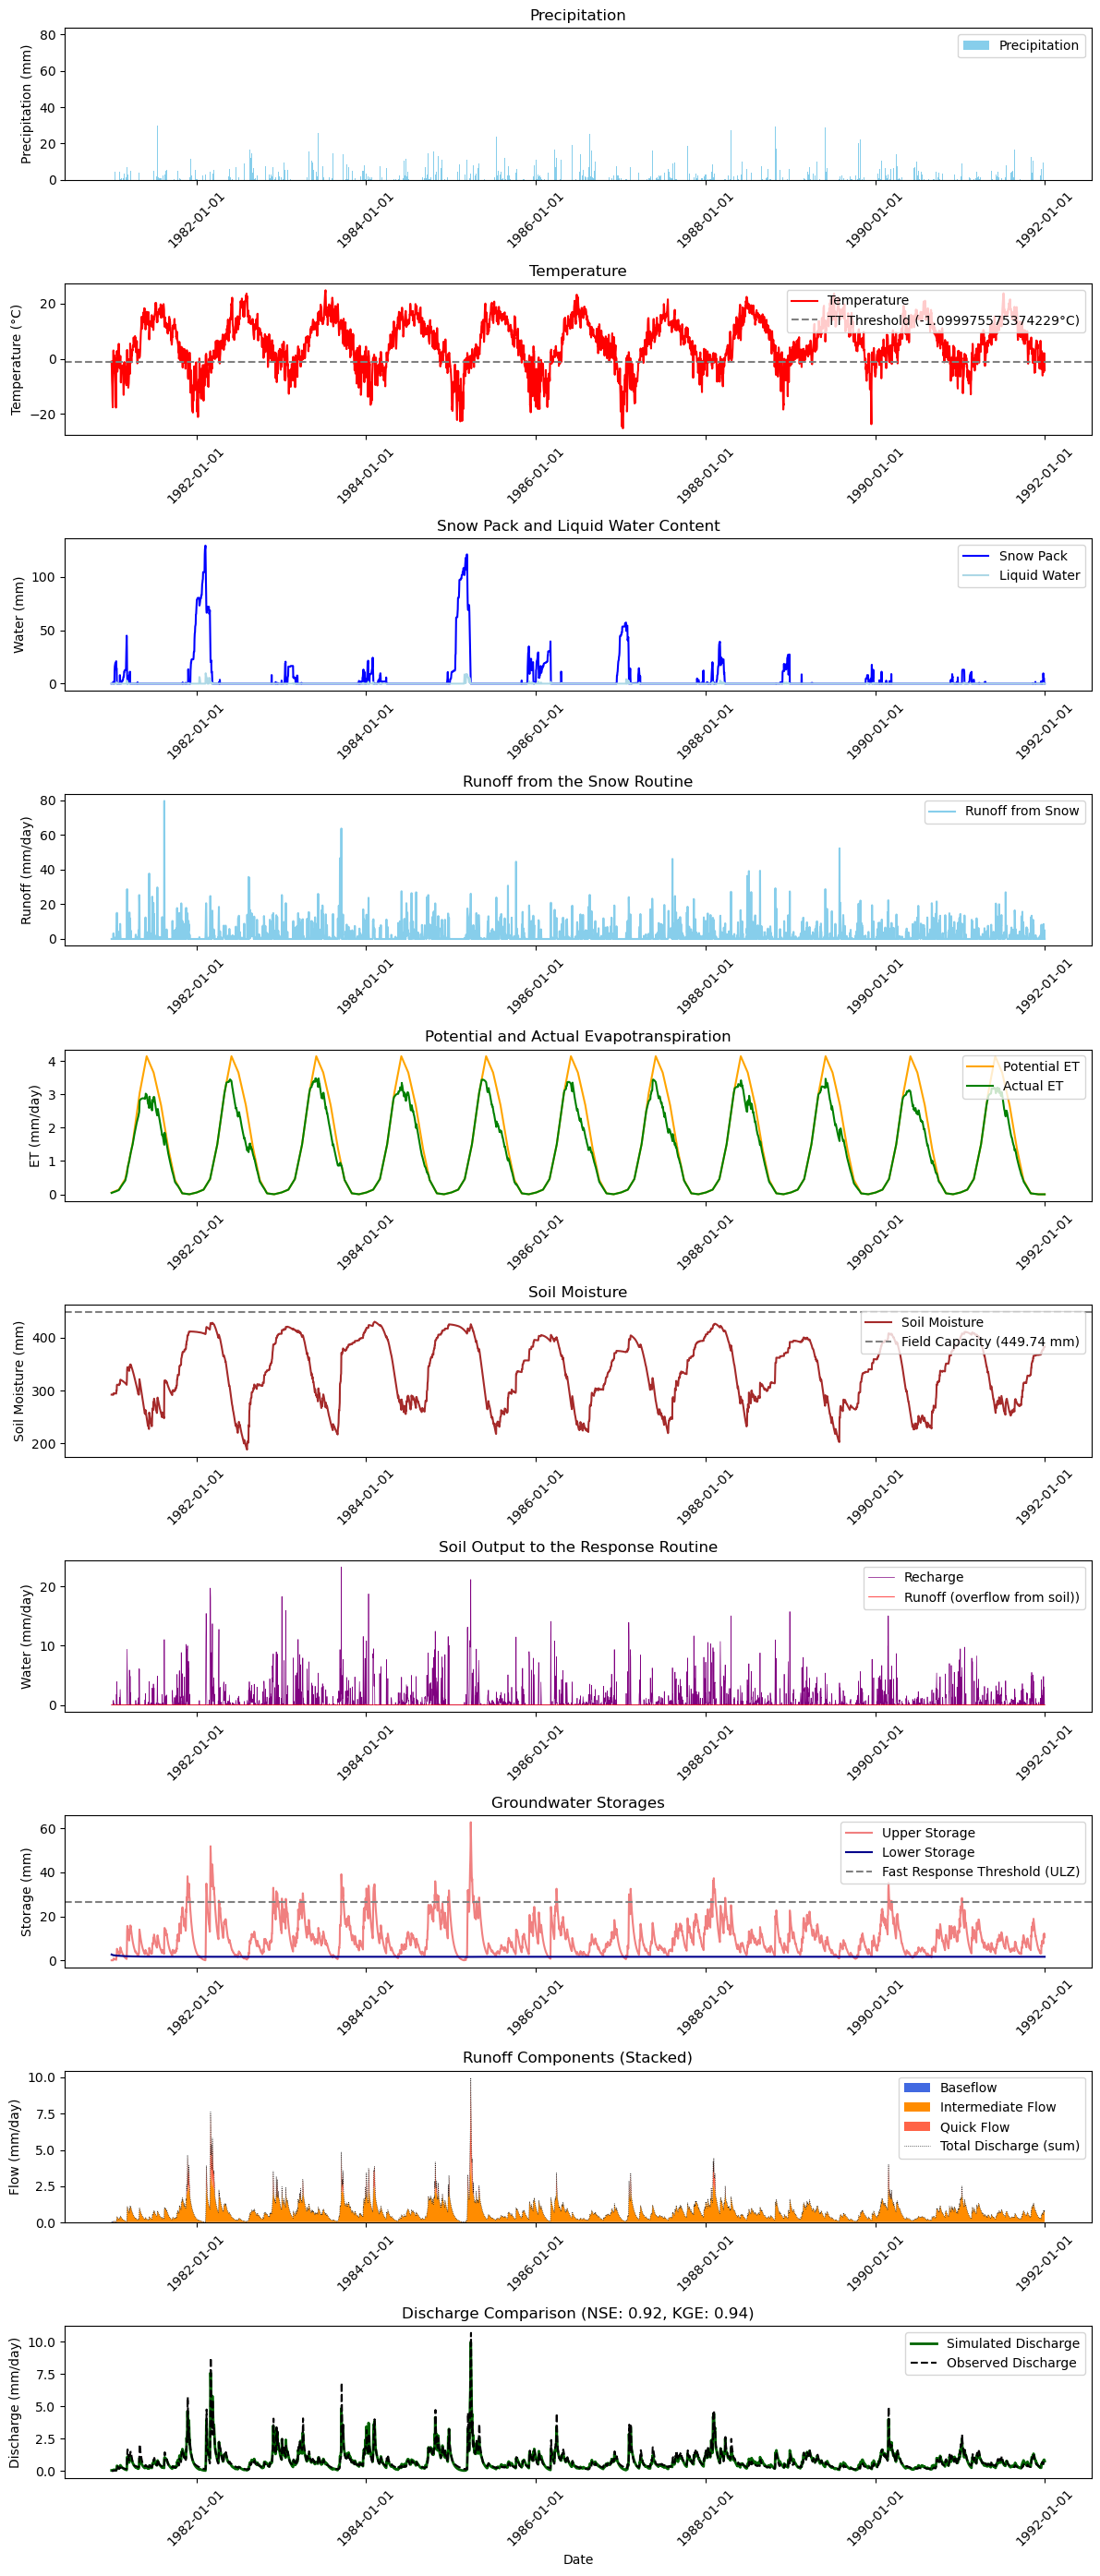

In [6]:
results = calibrate_hbv_model(
    model,
    method='L-BFGS-B',     # Optimization algorithm——Options include 'SLSQP', 'L-BFGS-B', 'Nelder-Mead', etc.
    objective='NSE',    # Objective function to optimize
    iterations=500000000,     # Maximum iterations
    verbose=True,       # Print progress
    plot_results=True   # Plot results after calibration
)

# The model now has calibrated parameters
# You can access them via model.params

# You can also access the calibration results
optimized_params = results['parameters']
performance = results['performance']
optimization_details = results['optimization_result']


In [7]:
cal_par= model.params
cal_par

{'response': {'K0': {'min': 0.01, 'max': 0.9, 'default': 0.11323336086000878},
  'K1': {'min': 0.005, 'max': 0.5, 'default': 0.0646675395143037},
  'K2': {'min': 0.0005, 'max': 0.5, 'default': 0.018321217741902936},
  'UZL': {'min': 5.0, 'max': 50.0, 'default': 26.61999369079226},
  'PERC': {'min': 0.03, 'max': 25, 'default': 0.03}},
 'soil': {'FC': {'min': 50.0, 'max': 650, 'default': 449.7368169438645},
  'LP': {'min': 0.3, 'max': 1.0, 'default': 0.7745757831402357},
  'BETA': {'min': 1.0, 'max': 35, 'default': 3.3155189242761236}},
 'snow': {'TT': {'min': -2.0, 'max': 2.0, 'default': -1.099975575374229},
  'CFMAX': {'min': 1.0, 'max': 6.0, 'default': 6.0},
  'PCF': {'min': 0.65, 'max': 1.0, 'default': 1.0},
  'SFCF': {'min': 0, 'max': 1.5, 'default': 1.0368534489917745},
  'CFR': {'min': 0.0, 'max': 0.2, 'default': 0.06867576949957854},
  'CWH': {'min': 0.0, 'max': 0.2, 'default': 0.08436634612318128}}}

In [30]:
performance

{'NSE': 0.9126435653586553,
 'KGE': 0.8823810664350796,
 'PBIAS': 5.067602733997094,
 'r': 0.9577550413049972}

In [ ]:
custom_params_UBNB = {
    'snow': {
        'TT': {'min': -2.0, 'max': 2.0, 'default': 0.0},      # Temperature threshold for snow/rain (°C)
        'CFMAX': {'min': 1.0, 'max': 6.0, 'default': 4},      # Degree-day factor (mm/°C/day)
        'PCF': {'min': 0.3, 'max': 1.5, 'default': 0.67},      # Precipitation correction factor (-)
        'SFCF': {'min': 0, 'max': 1.5, 'default': 0.3},     # Snowfall correction factor (-)
        'CFR': {'min': 0.0, 'max': 0.2, 'default': 0.05},     # Refreezing coefficient (-)
        'CWH': {'min': 0.0, 'max': 0.2, 'default': 0.1}       # Water holding capacity of snow (-)
    },
    'soil': {
        'FC': {'min': 50.0, 'max': 650, 'default': 450.0},  # Field capacity (mm)
        'LP': {'min': 0.3, 'max': 1.0, 'default': 0.75},      # Limit for potential evaporation (-)
        'BETA': {'min': 1.0, 'max': 35, 'default': 3.0}      # Shape coefficient (-)
    },
    'response': {
        'K0': {'min': 0.01, 'max': 0.9, 'default': 0.12},      # Quick flow recession coefficient (1/day)
        'K1': {'min': 0.05, 'max': 0.5, 'default': 0.05},     # Intermediate flow recession coefficient (1/day)
        'K2': {'min': 0.005, 'max': 0.5, 'default': 0.05},     # Baseflow recession coefficient (1/day)
        'UZL': {'min': 5.0, 'max': 50.0, 'default': 28.0},    # Upper zone threshold (mm)
        'PERC': {'min': 0.03, 'max': 25, 'default': 0.25}     # Percolation rate (mm/day)
    }
}
custom_params_lookout = {
    'snow': {
        'TT': {'min': -2.0, 'max': 2.0, 'default': 0.0},      # Temperature threshold for snow/rain (°C)
        'CFMAX': {'min': 1.0, 'max': 6.0, 'default': 4},      # Degree-day factor (mm/°C/day)
        'PCF': {'min': 0.65, 'max': 1.0, 'default': 0.67},      # Precipitation correction factor (-)
        'SFCF': {'min': 0, 'max': 1.5, 'default': 0.3},     # Snowfall correction factor (-)
        'CFR': {'min': 0.0, 'max': 0.2, 'default': 0.05},     # Refreezing coefficient (-)
        'CWH': {'min': 0.0, 'max': 0.2, 'default': 0.1}       # Water holding capacity of snow (-)
    },
    'soil': {
        'FC': {'min': 50.0, 'max': 650, 'default': 450.0},  # Field capacity (mm)
        'LP': {'min': 0.3, 'max': 1.0, 'default': 0.75},      # Limit for potential evaporation (-)
        'BETA': {'min': 1.0, 'max': 35, 'default': 3.0}      # Shape coefficient (-)
    },
    'response': {
        'K0': {'min': 0.01, 'max': 0.9, 'default': 0.12},      # Quick flow recession coefficient (1/day)
        'K1': {'min': 0.05, 'max': 0.5, 'default': 0.05},     # Intermediate flow recession coefficient (1/day)
        'K2': {'min': 0.005, 'max': 0.5, 'default': 0.05},     # Baseflow recession coefficient (1/day)
        'UZL': {'min': 5.0, 'max': 50.0, 'default': 28.0},    # Upper zone threshold (mm)
        'PERC': {'min': 0.03, 'max': 25, 'default': 0.25}     # Percolation rate (mm/day)
    }
}

custom_params_HBV_land ={'response': {'K0': {'min': 0.01, 'max': 0.9, 'default': 0.11323336086000878},
  'K1': {'min': 0.005, 'max': 0.5, 'default': 0.0646675395143037},
  'K2': {'min': 0.0005, 'max': 0.5, 'default': 0.018321217741902936},
  'UZL': {'min': 5.0, 'max': 50.0, 'default': 26.61999369079226},
  'PERC': {'min': 0.03, 'max': 25, 'default': 0.03}},
 'soil': {'FC': {'min': 50.0, 'max': 650, 'default': 449.7368169438645},
  'LP': {'min': 0.3, 'max': 1.0, 'default': 0.7745757831402357},
  'BETA': {'min': 1.0, 'max': 35, 'default': 3.3155189242761236}},
 'snow': {'TT': {'min': -2.0, 'max': 2.0, 'default': -1.099975575374229},
  'CFMAX': {'min': 1.0, 'max': 6.0, 'default': 6.0},
  'PCF': {'min': 0.65, 'max': 1.0, 'default': 1.0},
  'SFCF': {'min': 0, 'max': 1.5, 'default': 1.0368534489917745},
  'CFR': {'min': 0.0, 'max': 0.2, 'default': 0.06867576949957854},
  'CWH': {'min': 0.0, 'max': 0.2, 'default': 0.08436634612318128}}}